<a href="https://colab.research.google.com/github/YifanSong348/STATS302/blob/main/Week%205/USArrests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STATS302 HW 5 - Yifan Song
###Problem 3. Clustering (B)
[ISL] 10.7 - 9

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import scale, StandardScaler

import statsmodels.api as sm
from statsmodels.api import OLS

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# import dataset
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['USArrests.csv']))

Saving USArrests.csv to USArrests.csv


In [ ]:
df.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
print(df.head())
print(df.describe())

        State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


# a.  Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

In [ ]:
X = df[['Murder', 'Assault', 'UrbanPop', 'Rape']]

clustering = AgglomerativeClustering(linkage="complete", affinity="euclidean", compute_full_tree=True).fit(X)

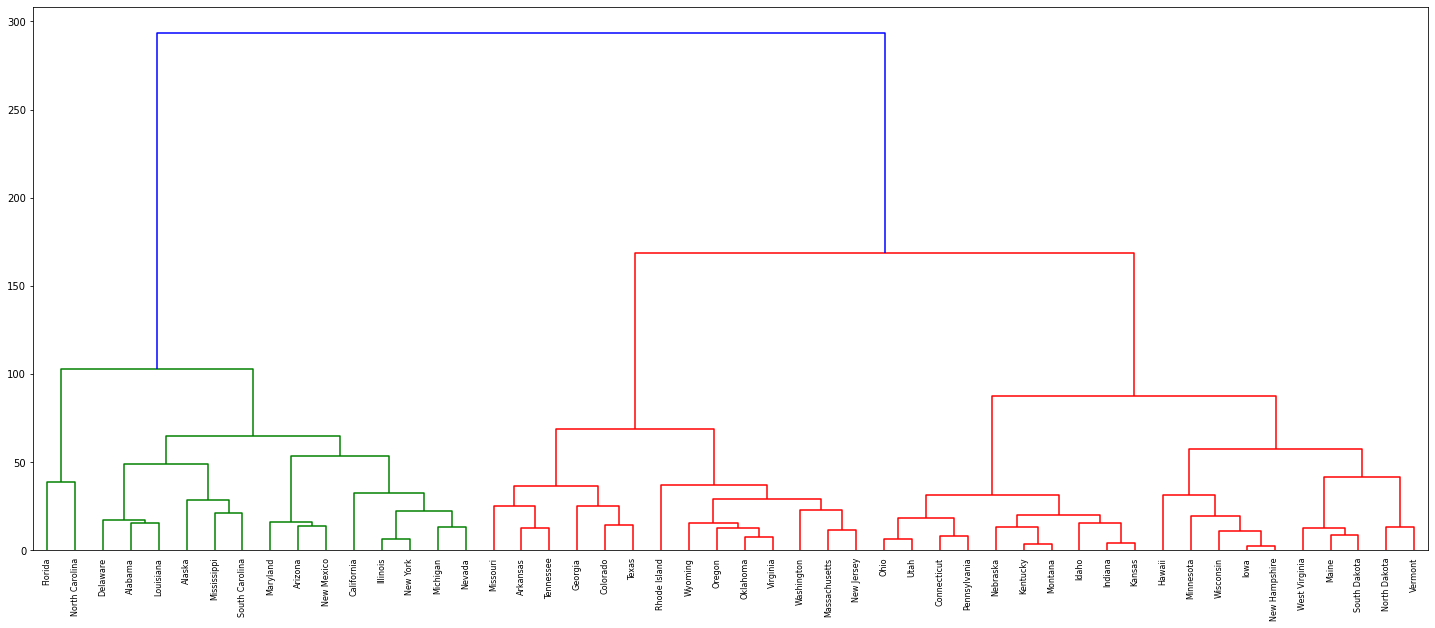

In [ ]:
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=df['State'].tolist())

# b.  Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

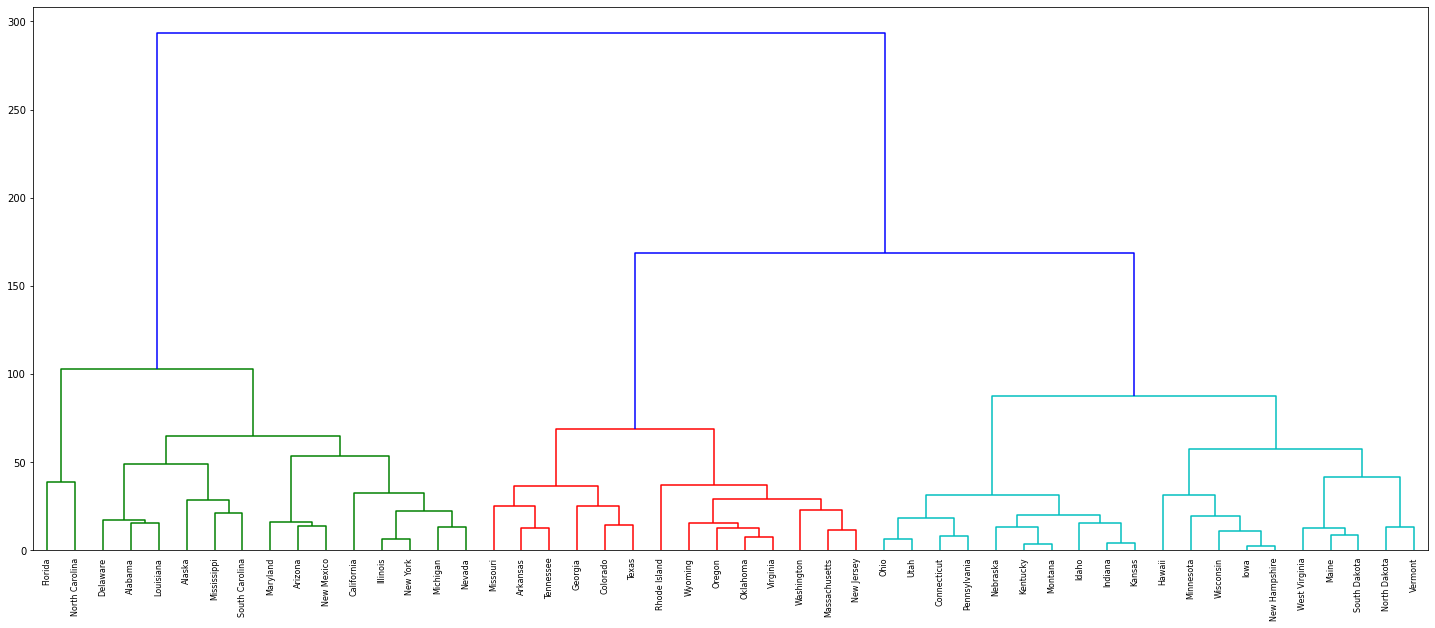

In [ ]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=df['State'].tolist(), color_threshold=120)

Each color represents a cluster.

# c. Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

clustering = AgglomerativeClustering(linkage="complete", affinity="euclidean", compute_full_tree=True).fit(scaled_X)

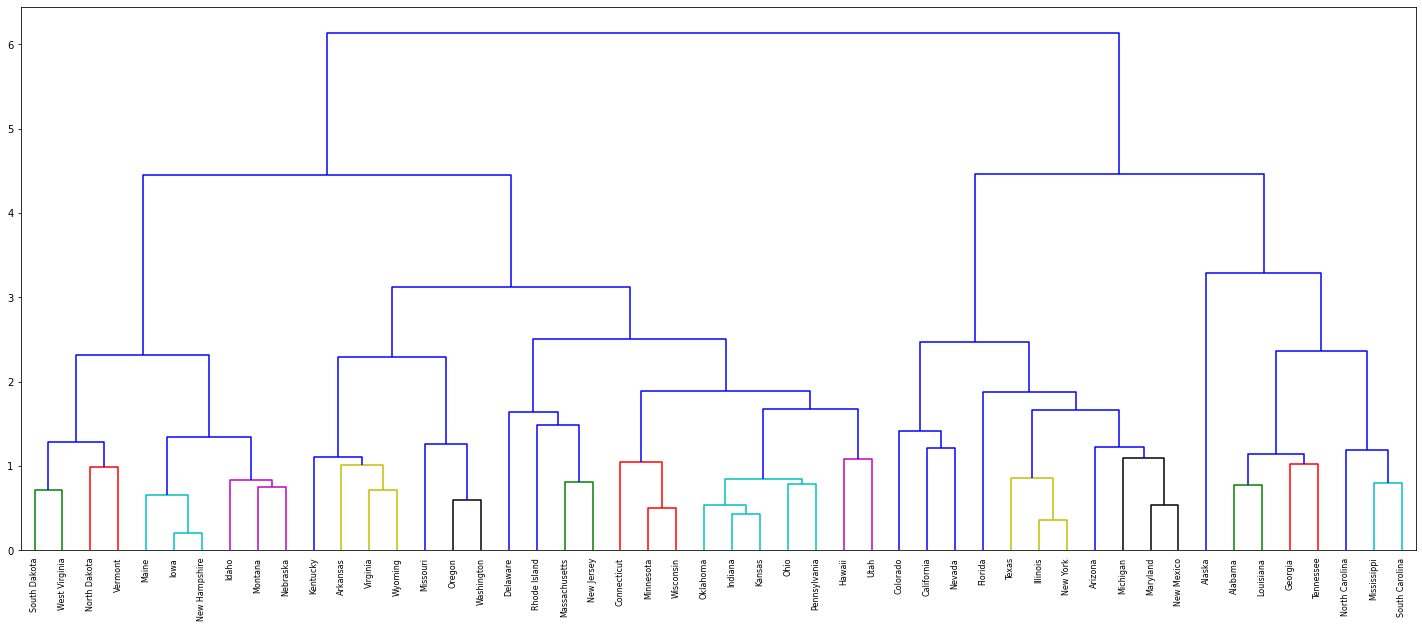

In [ ]:
Z = linkage(scaled_X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=df['State'].tolist(), color_threshold=1.1)

# d. What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

Scaling the variables affect the clusters by affecting the max height of the dendogram obtained from hierarchical clustering. 

The variables should be scaled beforehand because the data measures have different units. (UrbanPop compared to other three columns).